<img src = "https://images2.imgbox.com/c1/79/4H1V1tSO_o.png" width="1200">

# Roteiro para o Desafio
---

## 1 - Bases de dados
---

Segue os seguintes bancos de dados em formato csv:

https://drive.google.com/drive/folders/1N4sCFSZDXLYzccP-9t0JXGkF06wiAQS-?usp=sharing

`DEMO_PHQ.csv:` banco de dados contendo 5334 observações de adultos pesquisados no NHANES 2005-2006, segue PDF com detalhamento das variáveis:

https://drive.google.com/file/d/1a4bGPp-ZY2zZlqtkF_b_E9cPwiFAUznj/view?usp=sharing

`PAG_HEI.csv:` banco de dados contendo 9424 observações de crianças e adultos pesquisados no NHANES 2005-2006, segue PDF com detalhamento das variáveis:

https://drive.google.com/file/d/1Qc63Z0t5v7zHKUszWOQlHVCwBWG1Ps7i/view?usp=sharing

In [1]:
%pip install -q missingno 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_palette("pastel")

In [2]:
# Criando os DataFrames dos bancos de dados

DEMO_PHQ_df = pd.read_csv('datasets/DEMO_PHQ.csv')
PAG_HEI_df = pd.read_csv('datasets/PAG_HEI.csv')

In [3]:
DEMO_PHQ_df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [4]:
PAG_HEI_df

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


## 2 - Tratamento de dados
---

1. Faça a leitura dos bancos de dados e faça o tratamento que julgar necessário para as variáveis (exemplo: tratamento das categorias 7 = “Se recusou a responder” e 9 = “Não sabe”).

2. Em seguida, combine os dois bancos de dados fornecidos, utilizando a variável SEQN como chave única. O banco de dados final deve conter 5334 observações dos adultos respondentes do NHANES.

3. Crie a variável phq9 - escore Patient Health Questionnaire-9 como a soma das variáveis DPQ010 a DPQ090

4. Crie a variável phq_grp - grupo de sintomas de depressão que assume 0 (“sem sintomas”) se phq9 < 5, 1 (“sintomas leves”) se 5 <= phq9 < 10, 2 (“sintomas moderados”) se 10 <= phq9 < 15, 3 (“sintomas moderadamente severos”) se 15 <= phq9 < 19 e 4 (“sintomas severos”) se phq9 >= 20 

In [6]:
# Combinando datasets e setando SEQN como index

NHANES_df = pd.merge(DEMO_PHQ_df, PAG_HEI_df, on = 'SEQN', how = 'left').set_index('SEQN')
NHANES_df

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
SEQN,,,,,,,,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,...,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323


In [7]:
# Avaliando o percentual de dados faltantes

NHANES_df.isnull().mean().round(4)*100

DPQ010                      9.34
DPQ020                      9.34
DPQ030                      9.34
DPQ040                      9.34
DPQ050                      9.34
DPQ060                      9.34
DPQ070                      9.34
DPQ080                      9.34
DPQ090                      9.34
RIAGENDR                    0.00
RIDAGEYR                    0.00
RIDRETH1                    0.00
DMDEDUC                     0.00
INDFMINC                    0.88
PAG_MINW                    0.00
ADHERENCE                   0.00
HEI2015C1_TOTALVEG          5.14
HEI2015C2_GREEN_AND_BEAN    5.14
HEI2015C3_TOTALFRUIT        5.14
HEI2015C4_WHOLEFRUIT        5.14
HEI2015C5_WHOLEGRAIN        5.14
HEI2015C6_TOTALDAIRY        5.14
HEI2015C7_TOTPROT           5.14
HEI2015C8_SEAPLANT_PROT     5.14
HEI2015C9_FATTYACID         5.14
HEI2015C10_SODIUM           5.14
HEI2015C11_REFINEDGRAIN     5.14
HEI2015C12_SFAT             5.14
HEI2015C13_ADDSUG           5.14
HEI2015_TOTAL_SCORE         5.14
dtype: flo

In [8]:
# Descrição estatística do dataframe

NHANES_df.describe(percentiles=[.25, .5, .95, .99]).round(2)

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,4836.00,5334.00,...,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,0.31,0.31,0.55,0.72,0.32,0.21,0.23,0.15,0.05,1.52,...,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,0.76,0.71,0.93,0.91,0.74,0.62,0.64,0.59,0.33,0.50,...,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
95%,2.00,2.00,3.00,3.00,2.00,1.00,1.00,1.00,0.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,71.19
99%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,1.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,79.86
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,2.00,...,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [7]:
# Criando a variável PHQ9 para armazenar a soma das variáveis DPQ010 e DPQ090 

NHANES_df['PHQ9'] = NHANES_df.iloc[:,:9].sum(axis=1)
NHANES_df

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9
SEQN,,,,,,,,,,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,...,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,...,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0


In [9]:
# Distribuição de frequência dos scores para PHQ9

NHANES_df.iloc[:,:9].agg(['value_counts'])

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


In [19]:
# Distribuição de frequência 
# 1 = Masculino
# 2 = Feminino

NHANES_df.RIAGENDR.value_counts(sort=False)

2    2773
1    2561
Name: RIAGENDR, dtype: int64

In [8]:
# Classificando os sintomas com base na variável PHQ9 e armazenando na variável PHQ_GRP

NHANES_df['PHQ_GRP'] = NHANES_df['PHQ9'].apply( lambda x: 'sem sintomas' if x < 5
                                                else 'sintomas leves' if 5 <= x < 10
                                                else 'sintomas moderados' if 10 <= x < 15
                                                else 'sintomas moderadamente severos' if 15 <= x < 19
                                                else 'sintomas severos' if x >= 20
                                                else None )

NHANES_df[['DPQ010','DPQ090','PHQ9','PHQ_GRP']].head(30)

,DPQ010,DPQ090,PHQ9,PHQ_GRP
SEQN,,,,
31130,NaN,NaN,0.0,sem sintomas
31131,0.0,0.0,0.0,sem sintomas
31132,0.0,0.0,0.0,sem sintomas
31134,0.0,0.0,0.0,sem sintomas
31139,0.0,0.0,4.0,sem sintomas
31143,0.0,0.0,6.0,sintomas leves
31144,0.0,0.0,0.0,sem sintomas
31149,0.0,0.0,0.0,sem sintomas
31150,1.0,0.0,1.0,sem sintomas


In [9]:
# Quantidade de observações para a variável PHQ_GRP

NHANES_df['PHQ_GRP'].value_counts()

sem sintomas                      4294
sintomas leves                     712
sintomas moderados                 212
sintomas moderadamente severos      69
sintomas severos                    35
Name: PHQ_GRP, dtype: int64

## 3 - EDA: Análise Univariada
---

1. Faça uma análise univariada de todas as variáveis da análise.

2. Julgue como proceder com os casos faltantes nas variáveis.

3. Re-agrupe ou re-codifique as variáveis que julgar necessário.

In [11]:
# Quantidade de observações e variáveis do dataframe

NHANES_df.shape

(5334, 32)

<AxesSubplot:>

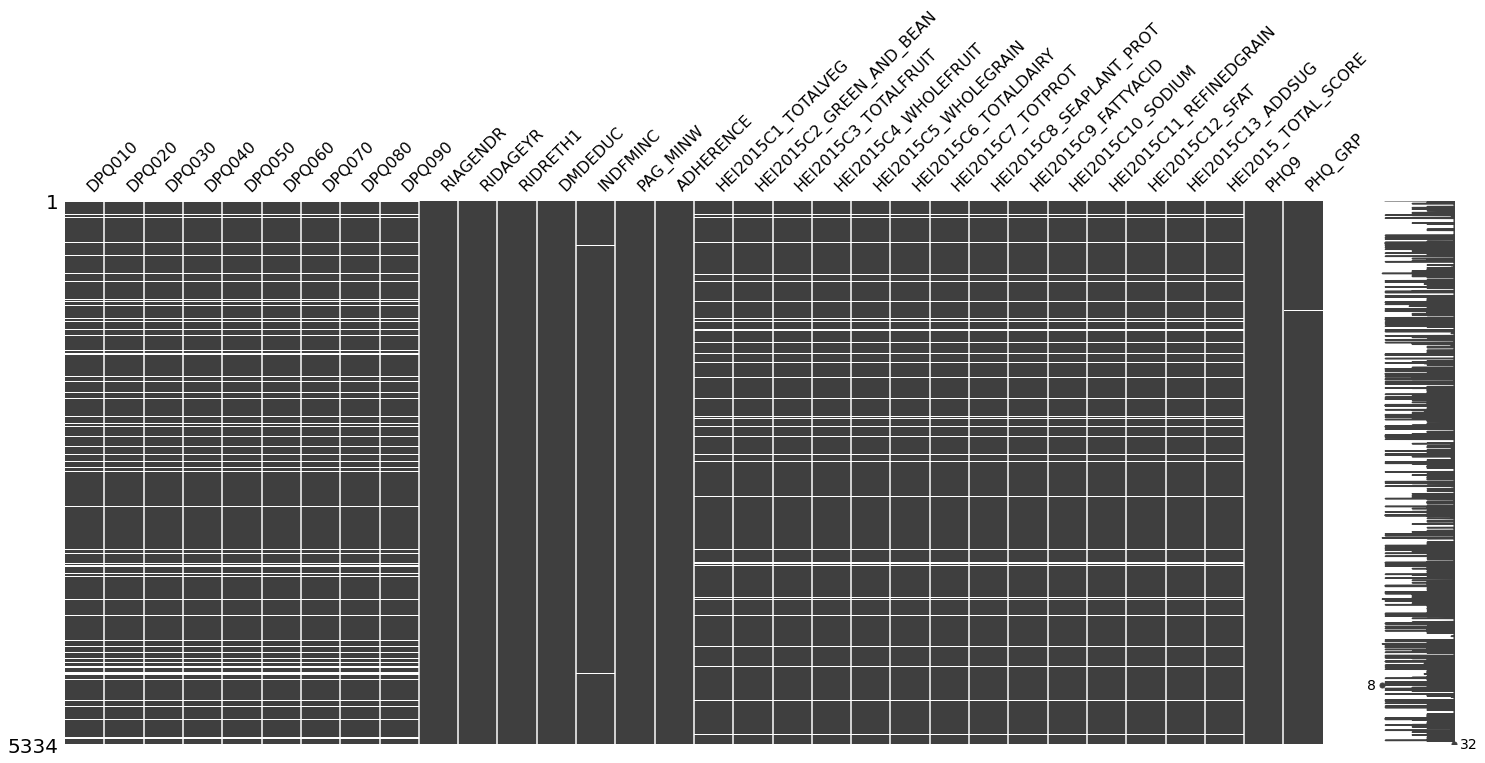

In [12]:
# Matriz de distribuição de dados, ou falta deles, no dataframe

msno.matrix(NHANES_df)

In [13]:
# Contagem dos valores não nulos em cada variável do dataframe e tipos de dados de cada variável do dataframe

NHANES_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 31130 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DPQ010                    4836 non-null   float64
 1   DPQ020                    4836 non-null   float64
 2   DPQ030                    4836 non-null   float64
 3   DPQ040                    4836 non-null   float64
 4   DPQ050                    4836 non-null   float64
 5   DPQ060                    4836 non-null   float64
 6   DPQ070                    4836 non-null   float64
 7   DPQ080                    4836 non-null   float64
 8   DPQ090                    4836 non-null   float64
 9   RIAGENDR                  5334 non-null   int64  
 10  RIDAGEYR                  5334 non-null   int64  
 11  RIDRETH1                  5334 non-null   int64  
 12  DMDEDUC                   5334 non-null   int64  
 13  INDFMINC                  5287 non-null   float64
 14  PAG

Verificando a existência de um relacionamento na presença de valores nulos entre cada uma das colunas:

- Valores próximos a + 1 indicam que a presença de valores nulos em uma coluna está correlacionada com a presença de valores nulos em outra coluna
- Valores próximos de - 1 indicam que a presença de valores nulos em uma coluna é anticorrelacionada com a presença de valores nulos em outra coluna

<AxesSubplot:>

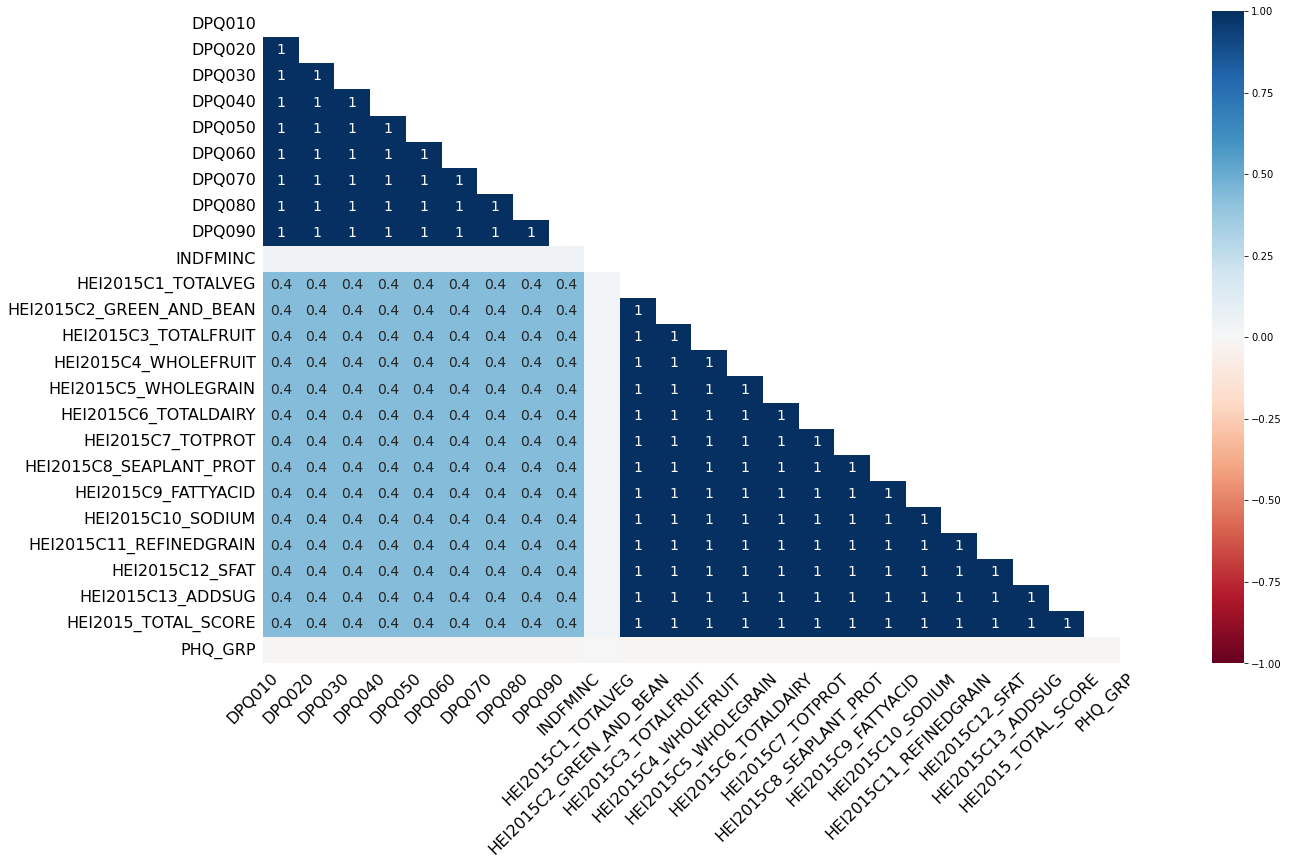

In [14]:
msno.heatmap(NHANES_df)

In [15]:
# Excluindo observações que contenham valores nulos

NHANES_df = NHANES_df.dropna()
NHANES_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4690 entries, 31131 to 41473
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DPQ010                    4690 non-null   float64
 1   DPQ020                    4690 non-null   float64
 2   DPQ030                    4690 non-null   float64
 3   DPQ040                    4690 non-null   float64
 4   DPQ050                    4690 non-null   float64
 5   DPQ060                    4690 non-null   float64
 6   DPQ070                    4690 non-null   float64
 7   DPQ080                    4690 non-null   float64
 8   DPQ090                    4690 non-null   float64
 9   RIAGENDR                  4690 non-null   int64  
 10  RIDAGEYR                  4690 non-null   int64  
 11  RIDRETH1                  4690 non-null   int64  
 12  DMDEDUC                   4690 non-null   int64  
 13  INDFMINC                  4690 non-null   float64
 14  PAG

In [16]:
# Descrição estatística do dataframe após a retirada dos valores nulos

NHANES_df.describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9
count,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,...,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000,4690.000000
mean,0.300853,0.304264,0.538806,0.708742,0.309808,0.203412,0.220256,0.142217,0.048827,1.517697,...,3.767505,4.437364,2.586357,4.710915,4.745121,5.834675,6.035230,6.206424,49.948629,2.777186
std,0.744998,0.698659,0.911695,0.904497,0.720899,0.604234,0.605209,0.574228,0.325833,0.499740,...,1.593257,1.000915,2.168689,3.231900,3.407103,3.480439,3.181152,3.334592,12.344883,3.888622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.059212,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.616103,4.173270,0.000000,2.017720,1.587219,2.992773,3.650763,3.723211,40.940208,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,4.940275,5.000000,2.564831,4.449510,4.819608,6.256305,6.370338,6.855633,49.480828,1.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,5.000000,5.000000,5.000000,7.262949,7.620636,9.296379,8.958154,9.403757,58.076880,4.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,...,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,89.529383,40.000000


In [17]:
# Quantidade atual de observações para a variável PHQ_GRP após a retirada dos valores nulos

NHANES_df['PHQ_GRP'].value_counts()

sem sintomas                      3706
sintomas leves                     684
sintomas moderados                 201
sintomas moderadamente severos      65
sintomas severos                    34
Name: PHQ_GRP, dtype: int64

In [18]:
# Dataframe analisado

NHANES_df

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,...,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,PHQ9,PHQ_GRP
SEQN,,,,,,,,,,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,sem sintomas
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,sem sintomas
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,sem sintomas
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,sem sintomas
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,...,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,sintomas leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,sem sintomas
41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,...,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,sintomas moderados
41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,sem sintomas


## Análise univariada 
---

In [21]:
# Patient Health Questionnaire-9 

ax = sns.histplot(NHANES_df.PHQ9, kde=True, bins=20)
ax.set_title('Distribuição de Frequências - PHQ9', fontsize=18)
ax.set_xlabel('', fontsize=14)
    
plt.show()

AttributeError: 'DataFrame' object has no attribute 'PHQ9'

In [41]:
# Distribuição de Frequência PHQ_GRP

ax = sns.countplot(y='PHQ_GRP', data=NHANES_df)
ax.set_title('Distribuição de Frequências - PHQ_GRP', fontsize=18, y=1.1)
ax.set_ylabel("", fontsize=14)
ax.set_yticklabels(["sem sintomas","sintomas leves", "sintomas moderados","sintomas moderadamente severos",  
                    "sintomas severos"],fontsize=13)

total = float(len(NHANES_df))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

ValueError: Could not interpret input 'PHQ_GRP'

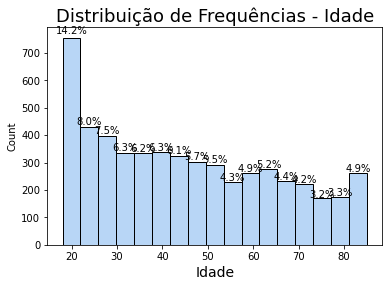

In [20]:
# Histograma de Distribuição de Frequências das idades

ax = sns.histplot(NHANES_df.RIDAGEYR)
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Idade', fontsize=14)
    
total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')    
plt.show()

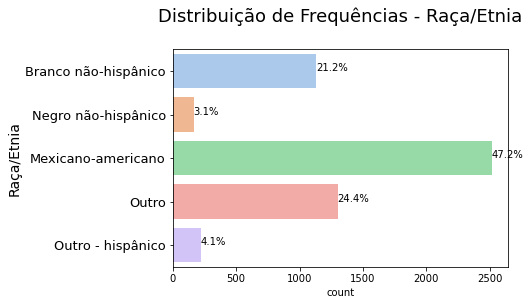

In [23]:
# Distribuição de Frequência da Raça/Etnia

ax = sns.countplot(y='RIDRETH1', data=NHANES_df)
ax.set_title('Distribuição de Frequências - Raça/Etnia', fontsize=18, y=1.1)
ax.set_ylabel("Raça/Etnia", fontsize=14)
ax.set_yticklabels(["Branco não-hispânico","Negro não-hispânico", "Mexicano-americano", 
                    "Outro", "Outro - hispânico"],fontsize=13)

total = float(len(NHANES_df))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (6).

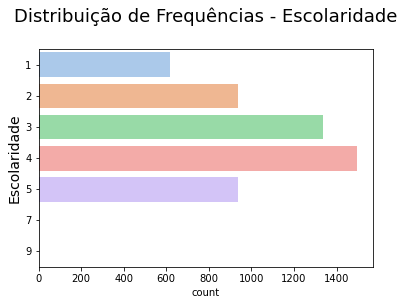

In [22]:
# Distribuição de Frequência da Escolaridade

ax = sns.countplot(y='DMDEDUC', data=NHANES_df)
ax.set_title('Distribuição de Frequências - Escolaridade', fontsize=18, y=1.1)
ax.set_ylabel("Escolaridade", fontsize=14)
ax.set_yticklabels(["Menor que 9° ano","9-12° ano", "Ensino médio","Ensino superior incompleto", 
                    "Superior completo ou maior","Não sabe"], fontsize=12)

total = float(len(NHANES_df))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

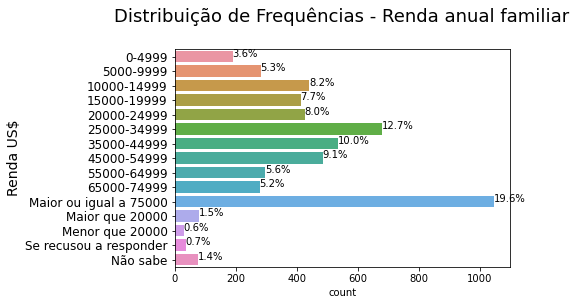

In [24]:
# Distribuição de Frequência da Renda

ax = sns.countplot(y='INDFMINC', data=NHANES_df)
ax.set_title('Distribuição de Frequências - Renda anual familiar', fontsize=18, y=1.1)
ax.set_ylabel("Renda US$", fontsize=14)
ax.set_yticklabels(["0-4999","5000-9999", "10000-14999","15000-19999","20000-24999","25000-34999", 
                    "35000-44999", "45000-54999","55000-64999","65000-74999","Maior ou igual a 75000",
                    "Maior que 20000","Menor que 20000","Se recusou a responder","Não sabe"],fontsize=12)

total = float(len(NHANES_df))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

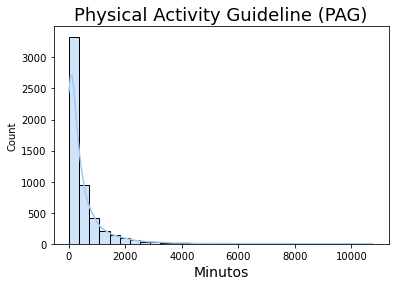

In [25]:
# Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos segundo o Physical Activity Guideline

ax = sns.histplot(NHANES_df.PAG_MINW, kde=True, bins=30)
ax.set_title('Physical Activity Guideline (PAG)', fontsize=18)
ax.set_xlabel('Minutos', fontsize=14)
plt.show()

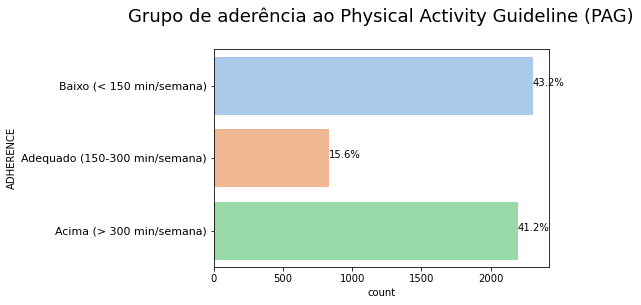

In [26]:
# Grupo de aderência ao Physical Activity Guideline

ax = sns.countplot(y='ADHERENCE', data=NHANES_df)
ax.set_title('Grupo de aderência ao Physical Activity Guideline (PAG)', fontsize=18, y=1.1)
ax.set_yticklabels(["Baixo (< 150 min/semana)", "Adequado (150-300 min/semana)","Acima (> 300 min/semana)"],fontsize=11)



total = float(len(NHANES_df))
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_width() 
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.show()

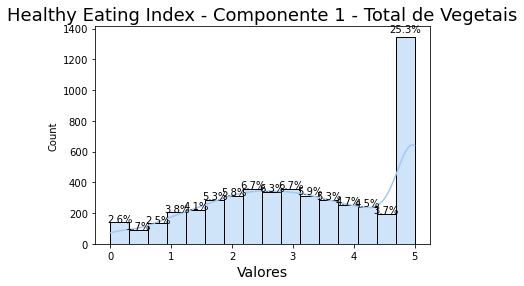

In [27]:
# Total de Vegetais 0-5

ax = sns.histplot(NHANES_df.HEI2015C1_TOTALVEG, kde=True)
ax.set_title('Healthy Eating Index - Componente 1 - Total de Vegetais', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

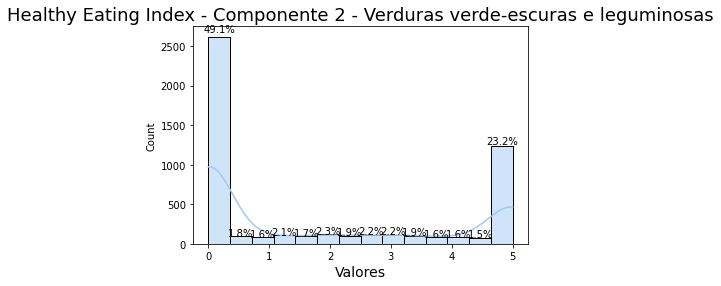

In [28]:
# Verduras verde-escuras e leguminosas 0-5

ax = sns.histplot(NHANES_df.HEI2015C2_GREEN_AND_BEAN, kde=True)
ax.set_title('Healthy Eating Index - Componente 2 - Verduras verde-escuras e leguminosas', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

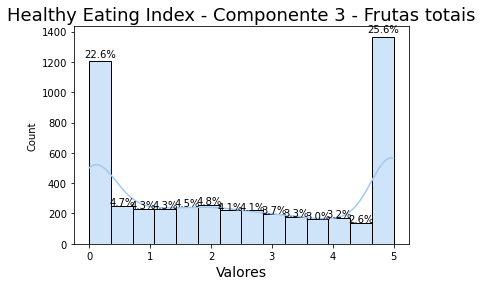

In [29]:
# Frutas totais 0-5

ax = sns.histplot(NHANES_df.HEI2015C3_TOTALFRUIT, kde=True)
ax.set_title('Healthy Eating Index - Componente 3 - Frutas totais', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

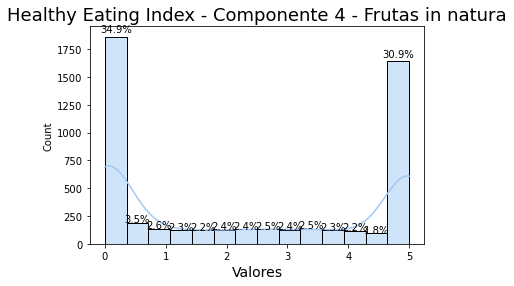

In [30]:
# Frutas in natura 0-5

ax = sns.histplot(NHANES_df.HEI2015C4_WHOLEFRUIT, kde=True)
ax.set_title('Healthy Eating Index - Componente 4 - Frutas in natura', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

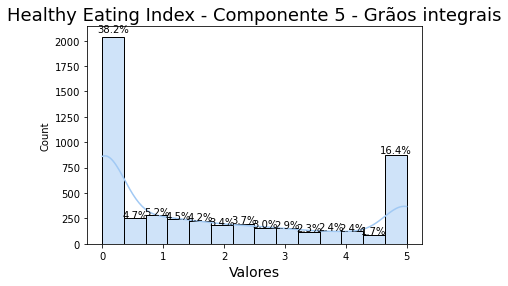

In [31]:
# Grãos integrais 0-10

ax = sns.histplot(NHANES_df.HEI2015C5_WHOLEGRAIN, kde=True)
ax.set_title('Healthy Eating Index - Componente 5 - Grãos integrais', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

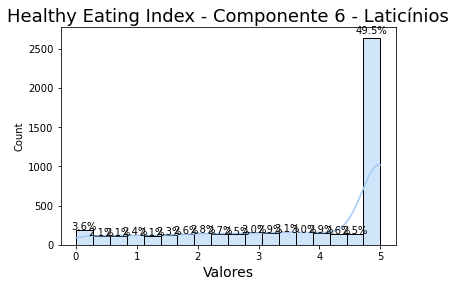

In [32]:
# Laticínios 0-10

ax = sns.histplot(NHANES_df.HEI2015C6_TOTALDAIRY, kde=True)
ax.set_title('Healthy Eating Index - Componente 6 - Laticínios', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

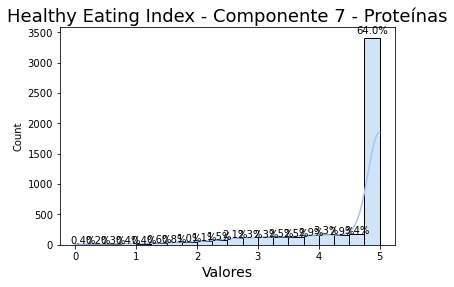

In [33]:
# Proteínas 0-5

ax = sns.histplot(NHANES_df.HEI2015C7_TOTPROT, kde=True, bins=20)
ax.set_title('Healthy Eating Index - Componente 7 - Proteínas', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')     
plt.show()

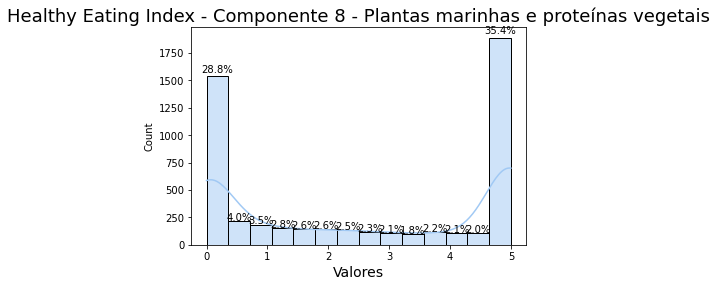

In [34]:
# Plantas marinhas e proteínas vegetais 0-5

ax = sns.histplot(NHANES_df.HEI2015C8_SEAPLANT_PROT, kde=True)
ax.set_title('Healthy Eating Index - Componente 8 - Plantas marinhas e proteínas vegetais', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

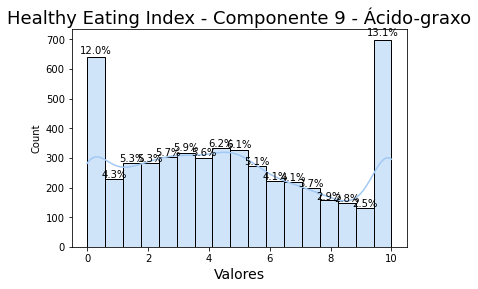

In [35]:
# Ácido-graxo 0-10

ax = sns.histplot(NHANES_df.HEI2015C9_FATTYACID, kde=True)
ax.set_title('Healthy Eating Index - Componente 9 - Ácido-graxo', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

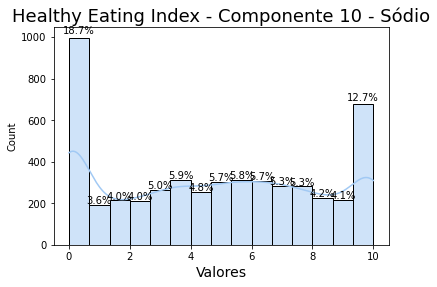

In [36]:
# Sódio 0-10

ax = sns.histplot(NHANES_df.HEI2015C10_SODIUM, kde=True)
ax.set_title('Healthy Eating Index - Componente 10 - Sódio', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

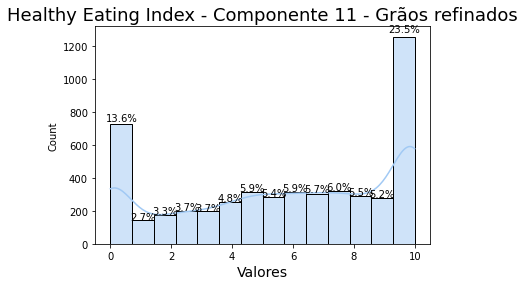

In [37]:
# Grãos refinados 0-10

ax = sns.histplot(NHANES_df.HEI2015C11_REFINEDGRAIN, kde=True)
ax.set_title('Healthy Eating Index - Componente 11 - Grãos refinados', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

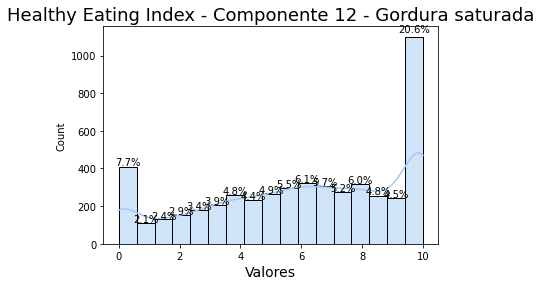

In [38]:
# Gordura saturada 0-10

ax = sns.histplot(NHANES_df.HEI2015C12_SFAT, kde=True)
ax.set_title('Healthy Eating Index - Componente 12 - Gordura saturada', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

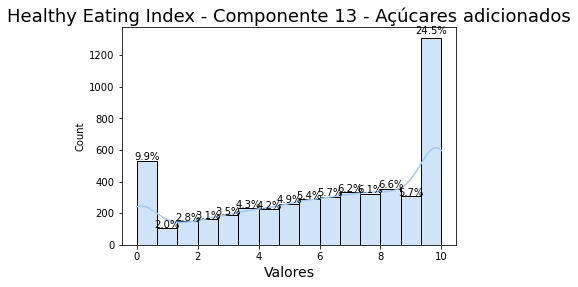

In [39]:
# Açúcares adicionados 0-10

ax = sns.histplot(NHANES_df.HEI2015C13_ADDSUG, kde=True)
ax.set_title('Healthy Eating Index - Componente 13 - Açúcares adicionados', fontsize=18)
ax.set_xlabel('Valores', fontsize=14)

total = float(len(NHANES_df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center') 
plt.show()

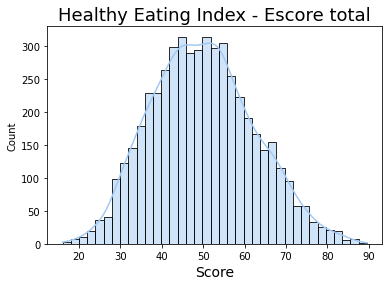

In [40]:
# Escore total 0-100

ax = sns.histplot(NHANES_df.HEI2015_TOTAL_SCORE, kde=True)
ax.set_title('Healthy Eating Index - Escore total', fontsize=18)
ax.set_xlabel('Score', fontsize=14)
plt.show()

# 4 - EDA: Análise Bivariada
---

1. Faça uma análise bivariada de sintomas de depressão (phq9 ou phq_grp) com as características demográficas. Descreva o perfil com maiores incidências de sintomas de depressão.

2. Faça uma análise bivariada de características demográficas x hábitos saudáveis. Qual perfil possui hábitos mais saudáveis?

3. Faça uma análise bivariada de sintomas de depressão (phq9 ou phq_grp) com os hábitos saudáveis (variáveis de atividade física e healthy eating index). O que podemos observar?

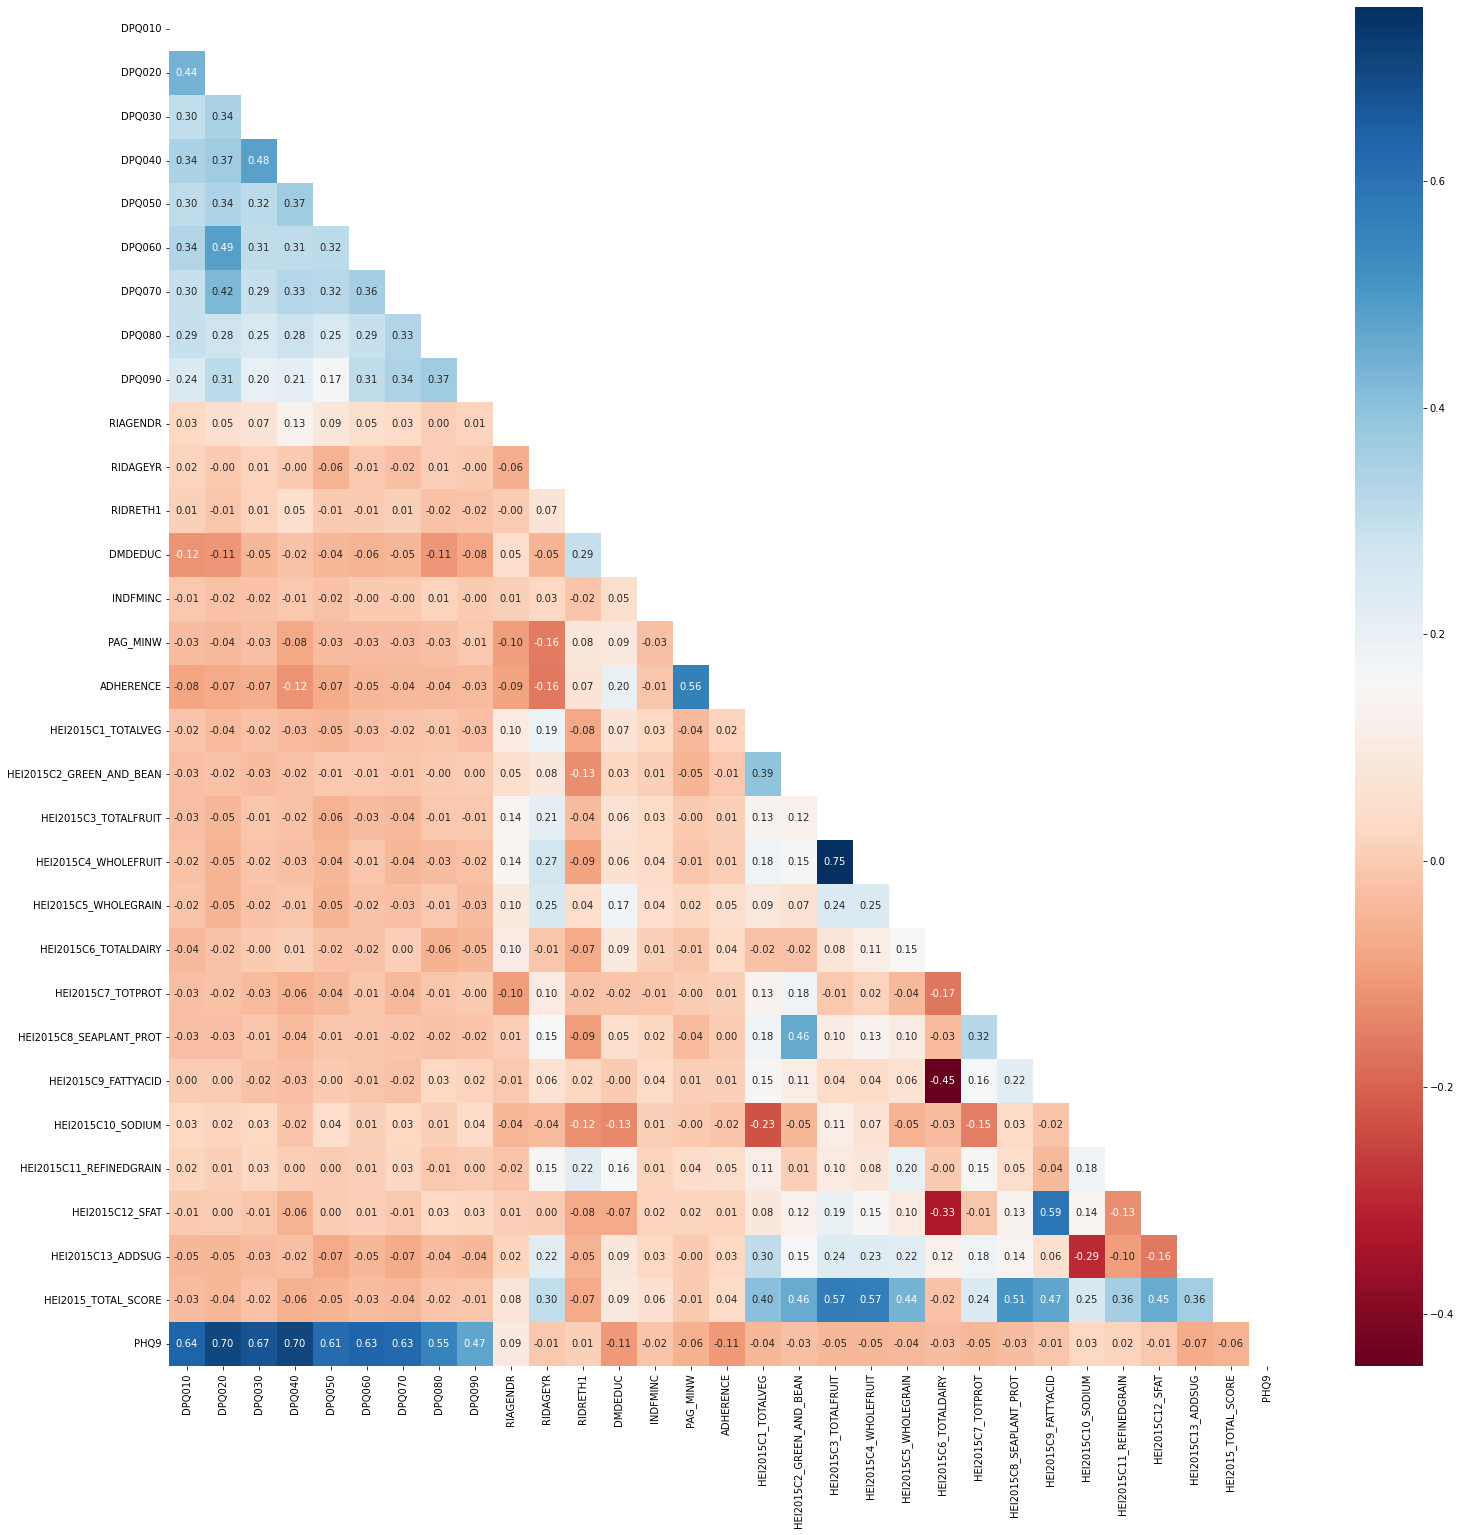

In [44]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(25,25))
sns.heatmap(
    NHANES_df.corr(),
    annot=True, 
    fmt='.2f', 
    cmap='RdBu', 
    mask=np.triu(
        np.ones_like(NHANES_df.corr()) 
    ) 
           )
plt.show()

PHQ9 apresenta correlação negativa com escolaridade, aderência ao Physical Activity Guideline

PHQ9 apresenta correlação positiva com DPQ20 e DPQ40

### Análise de perfis com maiores incidências de sintomas de depressão

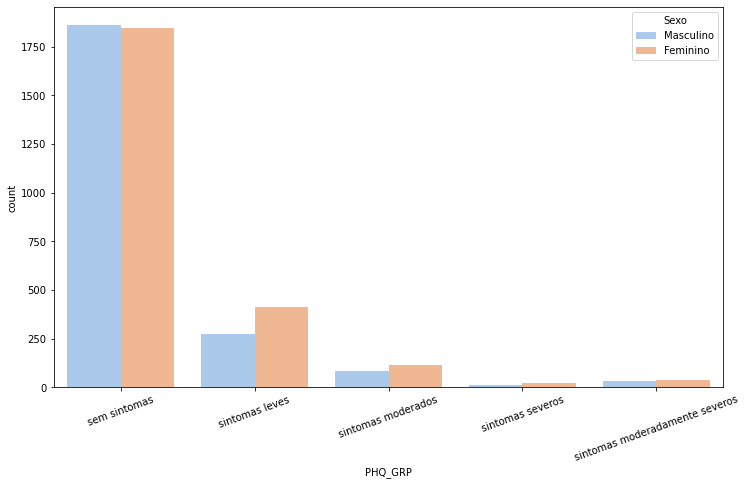

In [97]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PHQ_GRP', data=NHANES_df, hue='RIAGENDR')
plt.legend(title='Sexo', loc='upper right', labels=['Masculino', 'Feminino'])
plt.xticks(rotation=20)
plt.show()

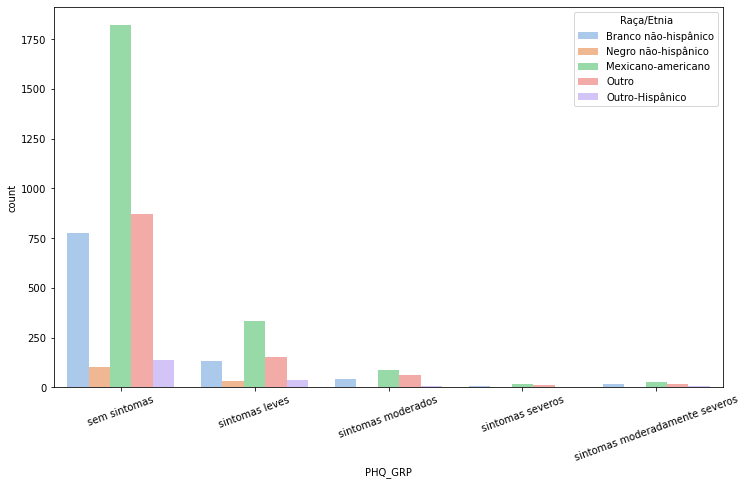

In [98]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PHQ_GRP', data=NHANES_df, hue='RIDRETH1')
plt.legend(title='Raça/Etnia', loc='upper right', labels=['Branco não-hispânico', 'Negro não-hispânico',
                                                          'Mexicano-americano','Outro','Outro-Hispânico'])
plt.xticks(rotation=20)
plt.show()

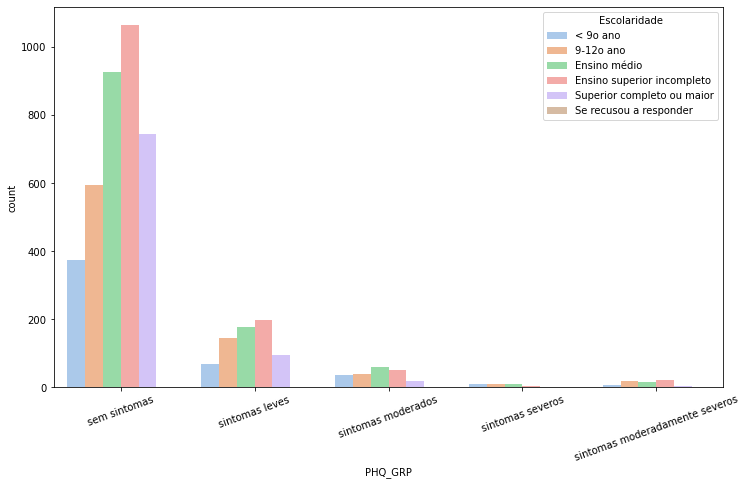

In [99]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PHQ_GRP', data=NHANES_df, hue='DMDEDUC')
plt.legend(title='Escolaridade', loc='upper right', labels=['< 9o ano','9-12o ano','Ensino médio',
                                                            'Ensino superior incompleto','Superior completo ou maior',
                                                            'Se recusou a responder','Não sabe'])
plt.xticks(rotation=20)
plt.show()

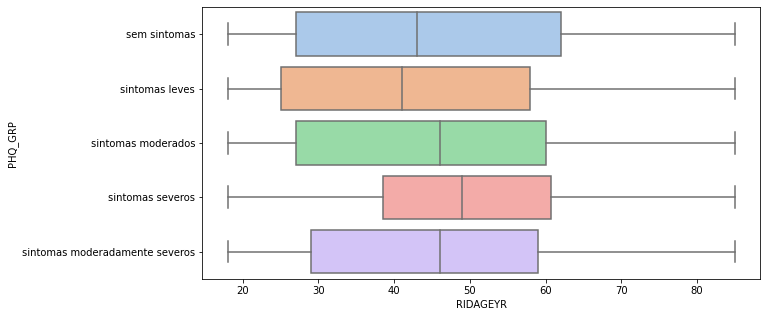

In [154]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='RIDAGEYR', y='PHQ_GRP', data=NHANES_df)
plt.show()

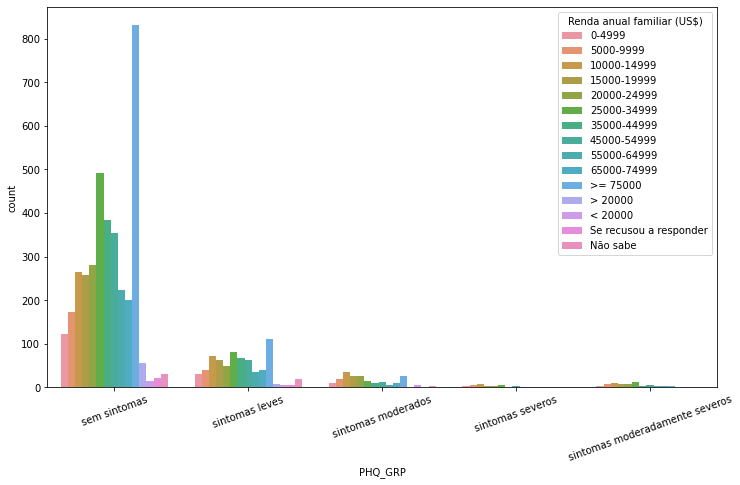

In [101]:
plt.figure(figsize=(12, 7))
sns.countplot(x='PHQ_GRP', data=NHANES_df, hue='INDFMINC')
plt.legend(title='Renda anual familiar (US$)', loc='upper right', labels=['0-4999','5000-9999','10000-14999',
                                                            '15000-19999','20000-24999','25000-34999','35000-44999',
                                                            '45000-54999','55000-64999','65000-74999','>= 75000','> 20000',
                                                            '< 20000','Se recusou a responder','Não sabe'])
plt.xticks(rotation=20)
plt.show()

- Prevalência de sintomas leves em
    - Mulheres
    - Mexicano-americanos
    - Ensino superior incompleto
    - Com renda anual maior ou igual a 75000 dólares
    
- Prevalência de sintomas moderados em
    - Mulheres
    - Mexicano-americanos 
    - Ensino médio
    - Com renda anual entre 10000-14999 dólares

- Prevalência de sintomas moderadamente severos em  
    - Mulheres
    - Mexicano-americanos
    - Ensino superior incompleto
    - Com renda anual entre 25000-34999 dólares
    
- Prevalência de sintomas severos em
    - Mulheres
    - Mexicano-americanos
    - Ensino médio
    - Com renda anual entre 10000-14999 dólares

Maior prevalência nas idades entre 30 a 60 anos

### Análise de características demográficas e hábitos saudáveis

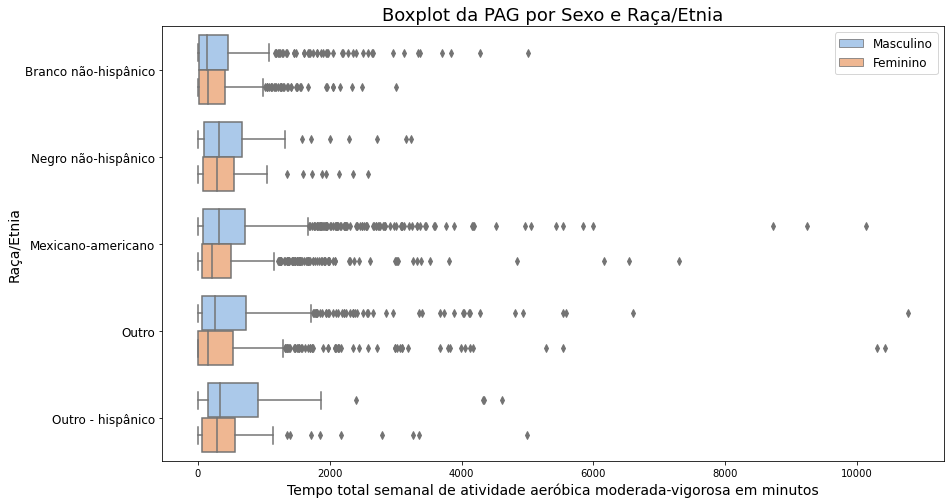

In [142]:
ax = sns.boxplot(x='PAG_MINW', y='RIDRETH1', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(14,8)

ax.set_title('Boxplot da PAG por Sexo e Raça/Etnia',fontsize=18)
ax.set_xlabel('Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos',fontsize=14)

ax.set_ylabel('Raça/Etnia', fontsize=14)
ax.set_yticklabels(["Branco não-hispânico","Negro não-hispânico", "Mexicano-americano", 
                    "Outro", "Outro - hispânico"],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

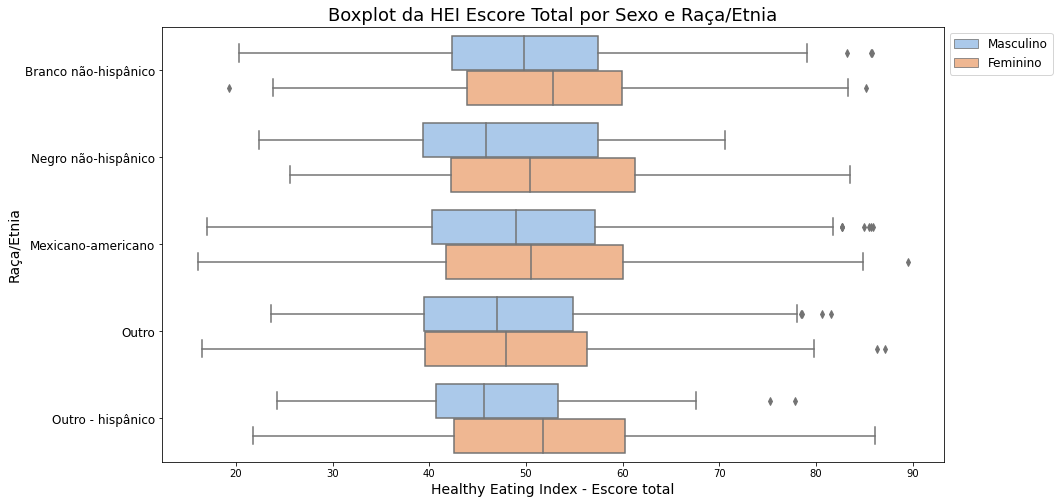

In [143]:
ax = sns.boxplot(x='HEI2015_TOTAL_SCORE', y='RIDRETH1', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(14,8)

ax.set_title('Boxplot da HEI Escore Total por Sexo e Raça/Etnia',fontsize=18)
ax.set_xlabel('Healthy Eating Index - Escore total',fontsize=14)

ax.set_ylabel('Raça/Etnia', fontsize=14)
ax.set_yticklabels(["Branco não-hispânico","Negro não-hispânico", "Mexicano-americano", 
                    "Outro", "Outro - hispânico"],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

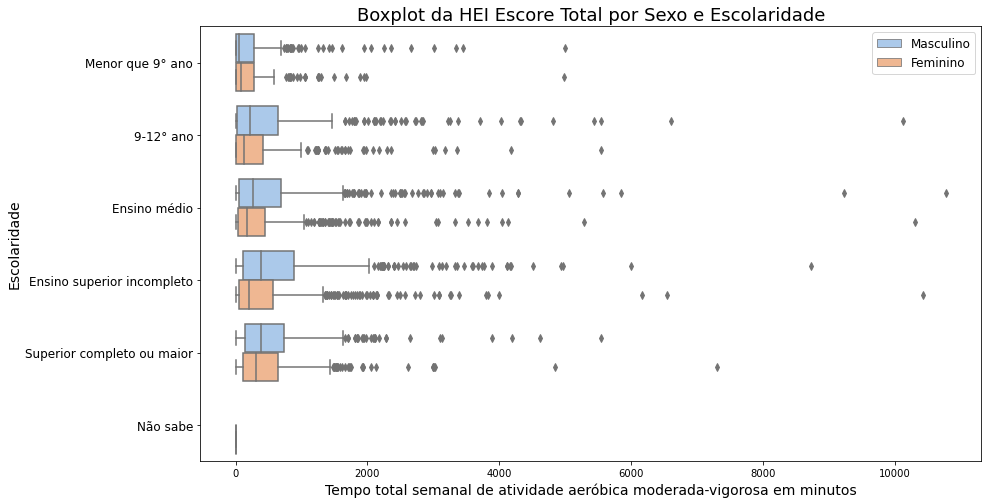

In [145]:
ax = sns.boxplot(x='PAG_MINW', y='DMDEDUC', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(14,8)

ax.set_title('Boxplot da HEI Escore Total por Sexo e Escolaridade',fontsize=18)
ax.set_xlabel('Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos',fontsize=14)

ax.set_ylabel('Escolaridade', fontsize=14)
ax.set_yticklabels(["Menor que 9° ano","9-12° ano", "Ensino médio","Ensino superior incompleto", 
                    "Superior completo ou maior","Não sabe"],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

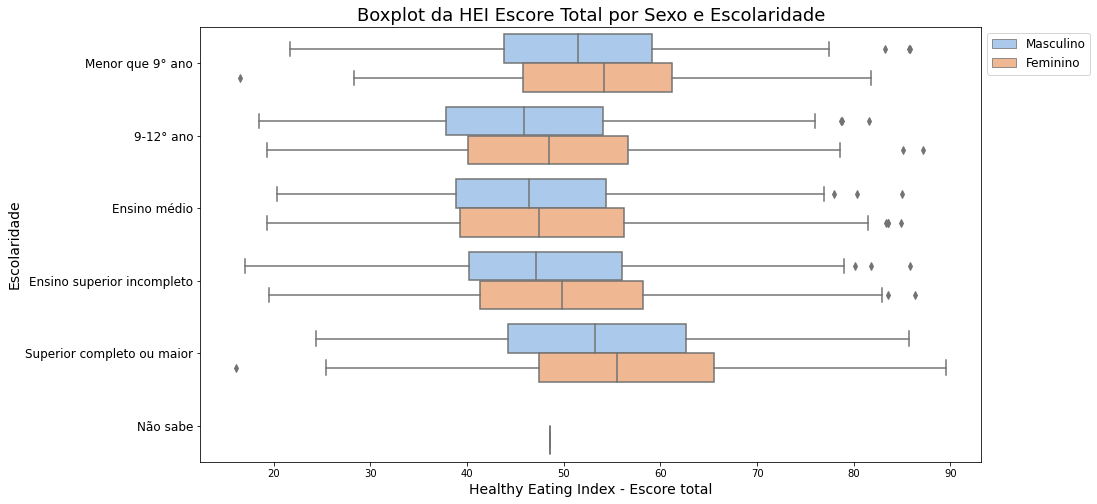

In [144]:
ax = sns.boxplot(x='HEI2015_TOTAL_SCORE', y='DMDEDUC', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(14,8)

ax.set_title('Boxplot da HEI Escore Total por Sexo e Escolaridade',fontsize=18)
ax.set_xlabel('Healthy Eating Index - Escore total',fontsize=14)

ax.set_ylabel('Escolaridade', fontsize=14)
ax.set_yticklabels(["Menor que 9° ano","9-12° ano", "Ensino médio","Ensino superior incompleto", 
                    "Superior completo ou maior","Não sabe"],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

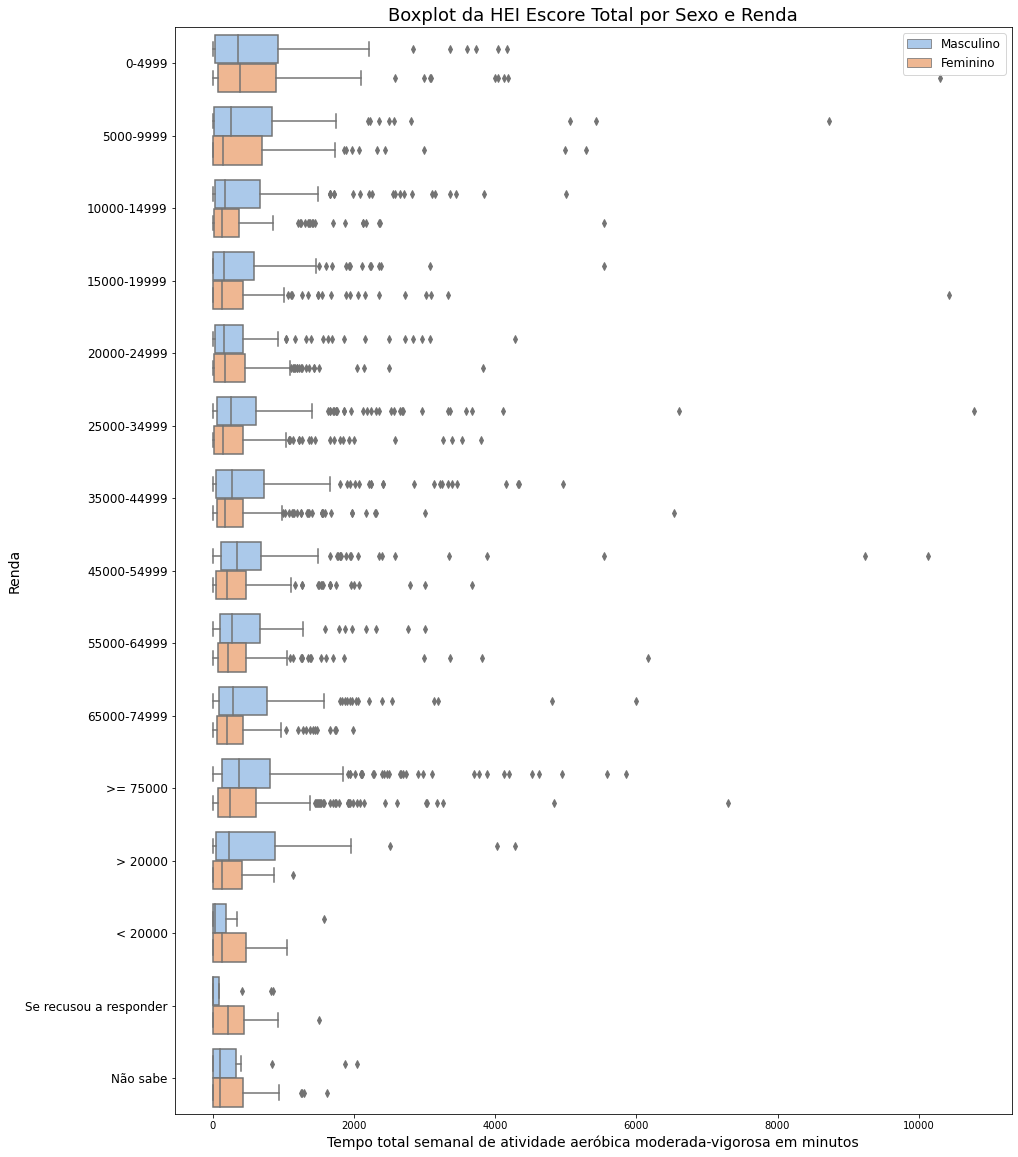

In [151]:
ax = sns.boxplot(x='PAG_MINW', y='INDFMINC', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(15,20)

ax.set_title('Boxplot da HEI Escore Total por Sexo e Renda',fontsize=18)
ax.set_xlabel('Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos',fontsize=14)

ax.set_ylabel('Renda', fontsize=14)
ax.set_yticklabels(['0-4999','5000-9999','10000-14999',
                    '15000-19999','20000-24999','25000-34999','35000-44999',
                    '45000-54999','55000-64999','65000-74999','>= 75000','> 20000',
                    '< 20000','Se recusou a responder','Não sabe'],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

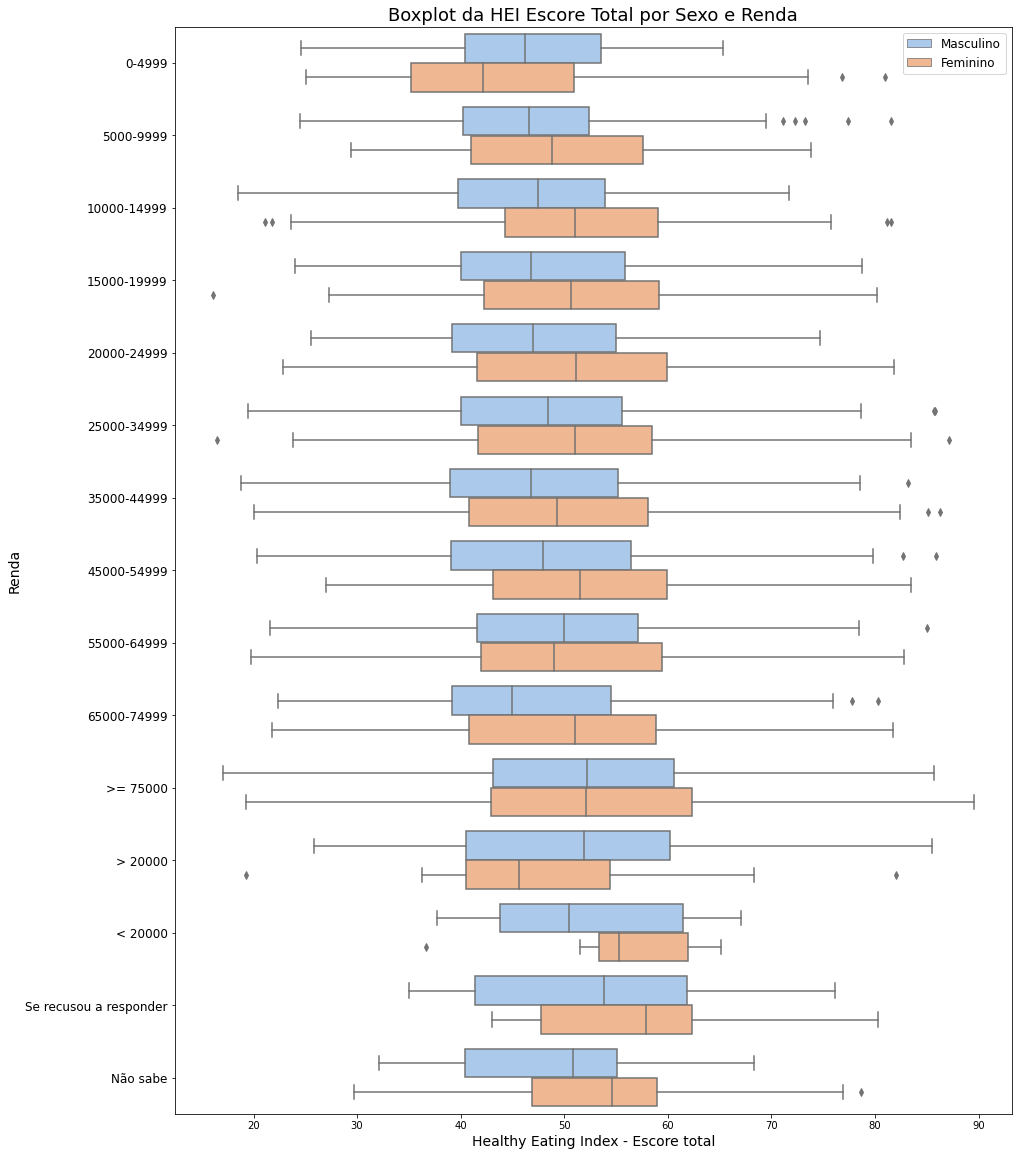

In [150]:
ax = sns.boxplot(x='HEI2015_TOTAL_SCORE', y='INDFMINC', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(15,20)

ax.set_title('Boxplot da HEI Escore Total por Sexo e Renda',fontsize=18)
ax.set_xlabel('Healthy Eating Index - Escore total',fontsize=14)

ax.set_ylabel('Renda', fontsize=14)
ax.set_yticklabels(['0-4999','5000-9999','10000-14999',
                    '15000-19999','20000-24999','25000-34999','35000-44999',
                    '45000-54999','55000-64999','65000-74999','>= 75000','> 20000',
                    '< 20000','Se recusou a responder','Não sabe'],fontsize=12)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

<AxesSubplot:xlabel='RIDAGEYR', ylabel='HEI2015_TOTAL_SCORE'>

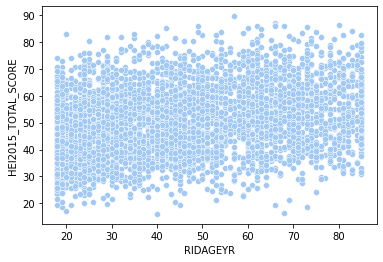

In [155]:
sns.scatterplot(x='RIDAGEYR', y='HEI2015_TOTAL_SCORE', data=NHANES_df)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='PAG_MINW'>

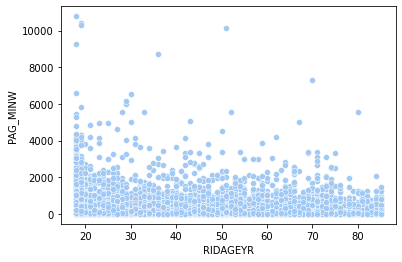

In [157]:
sns.scatterplot(x='RIDAGEYR', y='PAG_MINW', data=NHANES_df)

### Análise de sintomas de depressão e hábitos saudáveis (variáveis de atividade física e healthy eating index)

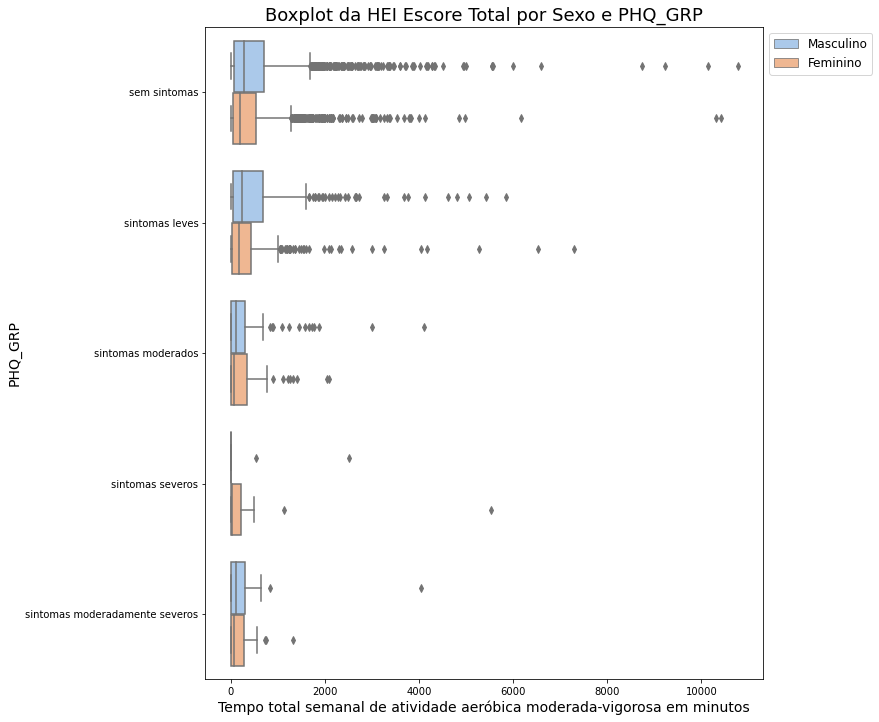

In [159]:
ax = sns.boxplot(x='PAG_MINW', y='PHQ_GRP', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(10,12)

ax.set_title('Boxplot da HEI Escore Total por Sexo e PHQ_GRP',fontsize=18)
ax.set_xlabel('Tempo total semanal de atividade aeróbica moderada-vigorosa em minutos',fontsize=14)

ax.set_ylabel('PHQ_GRP', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

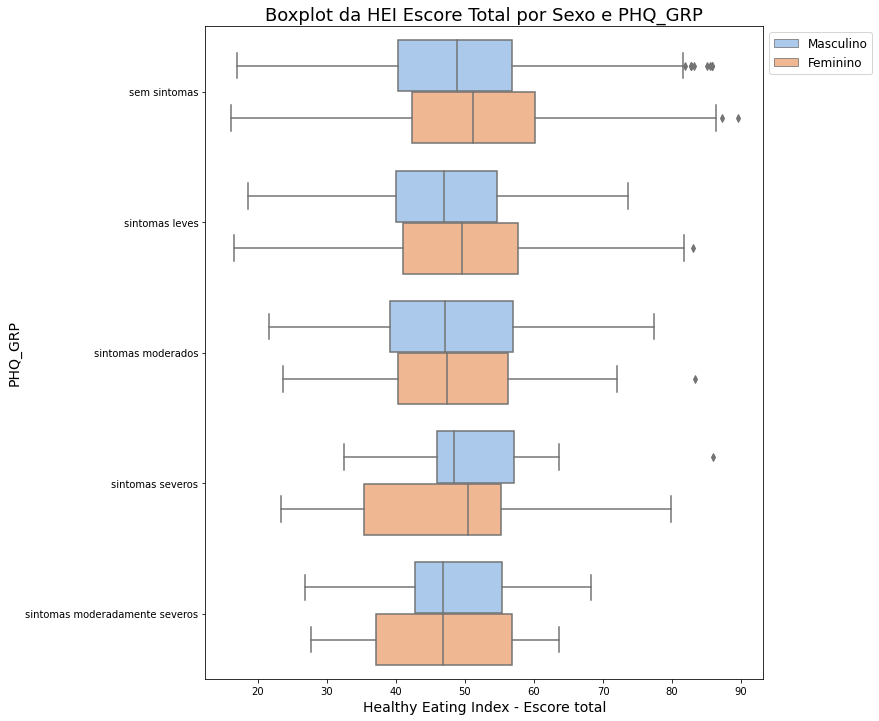

In [160]:
ax = sns.boxplot(x='HEI2015_TOTAL_SCORE', y='PHQ_GRP', data=NHANES_df, orient='h', hue='RIAGENDR')
ax.figure.set_size_inches(10,12)

ax.set_title('Boxplot da HEI Escore Total por Sexo e PHQ_GRP',fontsize=18)
ax.set_xlabel('Healthy Eating Index - Escore total',fontsize=14)

ax.set_ylabel('PHQ_GRP', fontsize=14)

handles, labels = ax.get_legend_handles_labels()
label = ['Masculino','Feminino']
ax.legend(handles, label ,fontsize=12, bbox_to_anchor=(1,1))
plt.show()

# 5 - Testes de hipóteses
---

1. Faça o(s) teste(s) de hipóteses adequado(s) para avaliar a significância estatística das diferenças nas características demográficas apontadas na análise bivariada. Quais são as características apresentam diferenças estatisticamente significativas para a frequência de sintomas de depressão?

2. Faça o(s) teste(s) de hipóteses adequado(s) para avaliar se existe associação entre hábitos saudáveis e sintomas de depressão.

# 6 - Aspectos da análise
---

1. Qual o tipo de estudo está sendo empregado pelo NHANES? experimental ou **observacional**?

2. Discuta as possíveis fontes de viés presentes na análise

3. A partir da análise realizada, podemos afirmar que hábitos saudáveis possuem um efeito causal na prevenção de depressão?

4. Quais são as fraquezas das análises realizadas? O que pode ser feito para melhorar?

5. Quais outras variáveis/informações poderiam ter sido coletadas para esta análise?